In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read data from file
df = pd.read_csv('/home/andres/Downloads/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


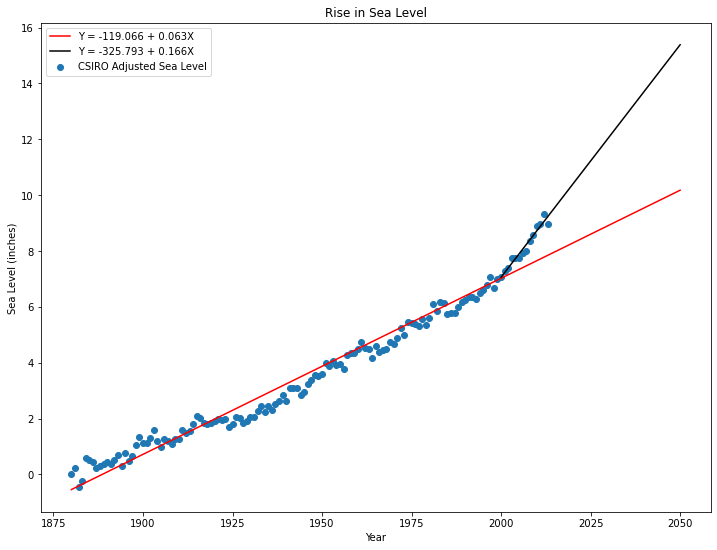

In [3]:
# Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the 
# "CSIRO Adjusted Sea Level" column as the y-axix.
fig,ax = plt.subplots(figsize=(12,9))
ax.scatter(x='Year', y='CSIRO Adjusted Sea Level', data=df)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

# Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. 
# Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to 
# predict the sea level rise in 2050.
full_years = pd.Series(range(1880,2051))
reg = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
line = [reg.slope*year + reg.intercept for year in full_years]
ax.plot(full_years,line,color='red',label=f'Y = {reg.intercept:.3f} + {reg.slope:.3f}X')

# Plot a new line of best fit just using the data from year 2000 through the most recent year in the 
# dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate 
# of rise continues as it has since the year 2000.
df_2000_2013 = df.iloc[120:]
extended_years = pd.Series(range(2000,2051))
reg2 = linregress(x=df_2000_2013['Year'],y=df_2000_2013['CSIRO Adjusted Sea Level'])
line2 = [reg2.slope*year + reg2.intercept for year in extended_years]
ax.plot(extended_years,line2,color='black',label=f'Y = {reg2.intercept:.3f} + {reg2.slope:.3f}X')
ax.legend()